# Исследование сервиса аренды самокатов GoFast #

<br>Задача:

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

<br>План:
1. Загрузить данные:
    - Считать csv фаилы с данными и сохранить их датафреймы
    - Вывести первые строки каждого набора данных. Изучить общую информацию о каждом датафрейме.
2. Провести предобработку данных:
    - Приведите столбец date к типу даты pandas.
    - Создайте новый столбец с номером месяца на основе столбца date.
    - Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.
    
3. Провести исследовательский анализ данных:
    - Частота встречаемости городов;
    - Соотношение пользователей с подпиской и без подписки;
    - Возраст пользователей;
    - Расстояние, которое пользователь преодолел за одну поездку;
    - Продолжительность поездок.

4. Объединение данных
    - Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge()
    - Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
      - c данными о пользователях без подписки;
      - с данными о пользователях с подпиской.
    - Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.
    
5. Подсчёт выручки
    - Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц
    - В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.
    
6. Проверка гипотез
    - Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
    - Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.
    - Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?
    
7. Сделать общий вывод
    
</div>

In [3]:
# добавим необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt

## 1 Загрузка данных

In [5]:
# загрузим данные из фаилов
users = pd.read_csv('/music/Practicum_projects/GoFast/datasets/users_go.csv')
rides = pd.read_csv('/music/Practicum_projects/GoFast/datasets/rides_go.csv')
sub_type = pd.read_csv('/music/Practicum_projects/GoFast/datasets/subscriptions_go.csv')

In [6]:
users.head(3)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [8]:
rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [9]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [10]:
sub_type.head(3)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [11]:
sub_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


Мы загрузили данные из трех фаилов. Пропуски в данных остуствуют. Названия столбцов редактировать не нужно. У некоторых столбцов нужно пометь тип данных.

## 2 Предобработка данных

In [14]:
# поменяем формат столбца date на дату
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

In [15]:
if (rides['date'].dt.year == 2021).all():
    print("Все даты относятся к 2021 году")
else:
    print("Есть даты, которые не относятся к 2021 году")

Все даты относятся к 2021 году


In [16]:
# добавим столбец с указанием месяца когда пользователь пользовался сервисом
rides['month'] = rides['date'].dt.month

In [17]:
rides.head(5)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [18]:
# проверим явные дубликаты среди пользователей
users.duplicated().sum()

31

Таких оказалось 31. Удалим их.

In [20]:
# удаляем дубликаты
users.drop_duplicates(inplace=True)

In [21]:
# добавим необходимую библиотеку
import math

# округлим данные в столбцах distance и duration
rides['distance'] = rides['distance'].apply(lambda x: math.ceil(x))
rides['duration'] = rides['duration'].apply(lambda x: math.ceil(x))

In [22]:
rides.head(5)

,user_id,distance,duration,date,month
0,1,4410,26,2021-01-01,1
1,1,2618,16,2021-01-18,1
2,1,755,7,2021-04-20,4
3,1,2695,19,2021-08-11,8
4,1,4029,27,2021-08-28,8


In [23]:
rides['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

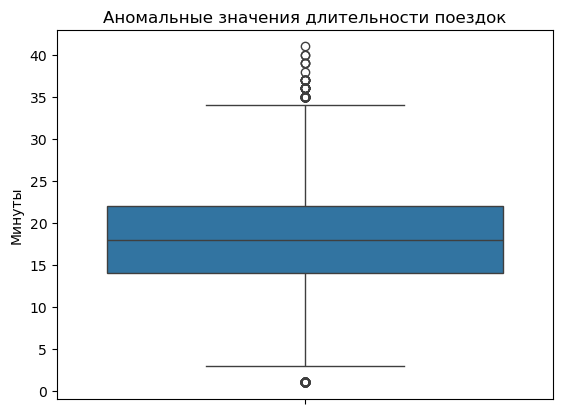

In [24]:
# загружаем необходимую библиотеку
import seaborn as sns

# проверим длительность поездок на аномальные значения
sns.boxplot (y = rides['duration']);
plt.title('Аномальные значения длительности поездок')
plt.ylabel('Минуты');

In [25]:
rides[rides['duration']>34]

,user_id,distance,duration,date,month
42,4,4650,36,2021-08-14,8
143,15,4188,39,2021-01-13,1
499,55,4152,37,2021-06-30,6
524,58,4764,36,2021-02-17,2
854,91,4445,36,2021-11-05,11
...,...,...,...,...,...
17119,1468,4745,35,2021-06-13,6
17235,1476,4218,35,2021-04-13,4
17353,1485,3808,35,2021-12-09,12
17684,1509,3729,35,2021-01-22,1


75 поездок. Самая длинная - 36 минут. Можно себе такое представить. Люди иногда катаются по полчаса на самокате. Не будем их удалять. 

In [27]:
rides[rides['duration']<5]

,user_id,distance,duration,date,month
5952,635,267,4,2021-12-23,12
6531,701,4197,1,2021-08-31,8
6570,704,4831,1,2021-10-14,10
6680,712,4685,1,2021-03-04,3
6691,712,24,3,2021-11-22,11
...,...,...,...,...,...
17722,1511,88,4,2021-01-21,1
17787,1515,560,4,2021-11-15,11
17802,1516,394,3,2021-07-28,7
17909,1524,4104,1,2021-06-18,6


183 короткие поездки. Немного. Возможно люди передумали и решили прекратить аренду.

Во время предобработки данных:
   - Был изменён формат столбца date с object на дату в датафрейме rides(поездки)
   - Был добавлен столбец с указанием месяца когда пользователь пользовался сервисом в датафрейме rides
   - Были удалены явные дубликаты(31 шт.) в датафрейме users(пользователи)
   - Были округлены данные в столбцах distance и duration в датафрейме rides

## 3 Исследовательский анализ данных

### Частота встречаемости городов

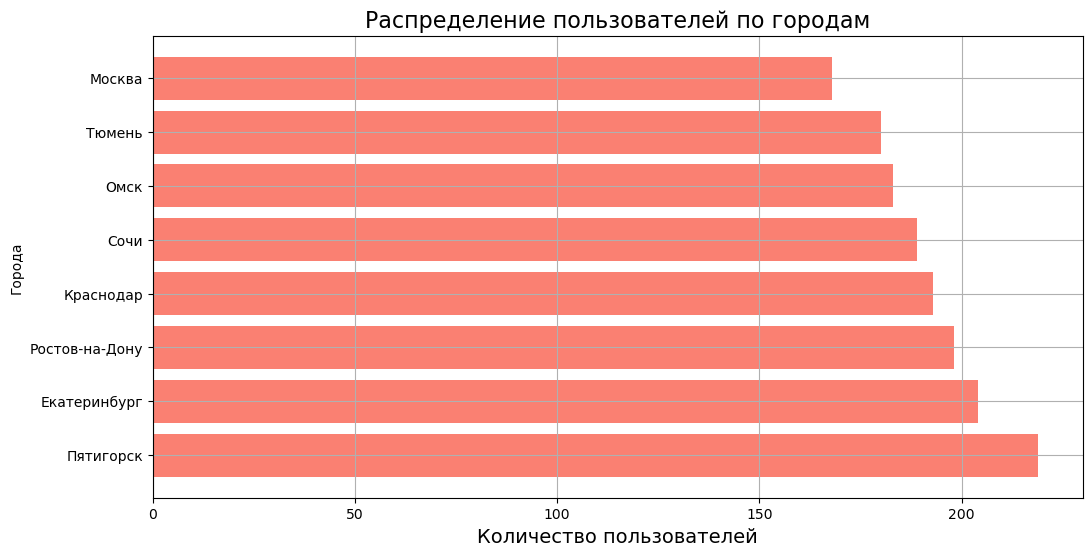

In [32]:
# создаем сводную таблицу, группируя пользователей по городу и считая их количество
users_cities = (
    users.pivot_table(index = 'city', values = 'user_id', aggfunc = 'count')
    .sort_values(by='user_id', ascending = False))

# строим горизонтальный бар-чарт
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(users_cities.index, users_cities.user_id, color='salmon', align='center', height=0.8)

# добавляем сетку
ax.grid(True)

# устанавливаем заголовки и подписи осей
ax.set_title('Распределение пользователей по городам', fontsize=16)
ax.set_xlabel('Количество пользователей', fontsize=14)
ax.set_ylabel('Города')

# показываем график
plt.show()

In [33]:
# посчитаем количество пользователей в каждом городе
users_per_city = users['city'].value_counts()
users_per_city

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

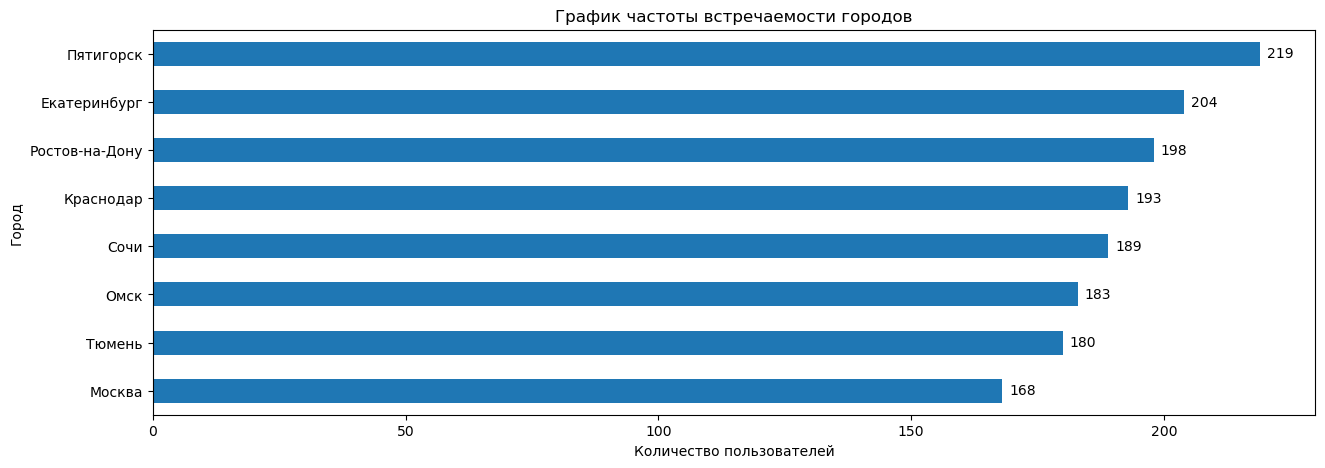

In [34]:
# Комментарий ревьюера
import matplotlib.pyplot as plt
import pandas as pd

# Создаем копию датасета, что бы не работать с исходным
tmp = users.copy()

# Построение горизонтальной диаграммы
ax = tmp['city'].value_counts(ascending=True).plot(
    kind='barh',
    figsize=(15, 5),
    title='График частоты встречаемости городов'
)

# Добавление значений рядом со столбцами
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

# Добавление меток осей
plt.xlabel('Количество пользователей')
plt.ylabel('Город')

# Отображение графика
plt.show()

Всего 8 городов представлено в исследовании. Больше всего пользователей в Пятигорске.

### Соотношение пользователей с подпиской и без подписки

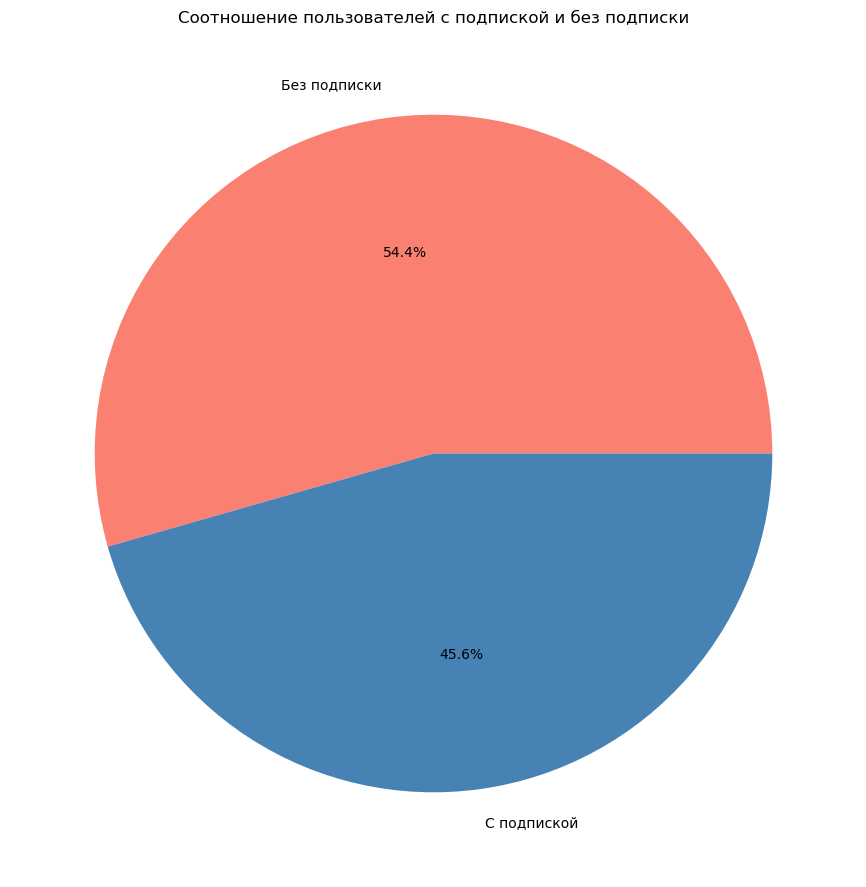

subscription_type
free     835
ultra    699
Name: count, dtype: int64

In [37]:
users_sub_type = users['subscription_type'].value_counts()

# Создание круговой диаграммы
users_sub_type.plot(
    kind='pie',
    y='user_id',
    autopct='%1.1f%%',
    labels=['Без подписки', 'С подпиской'],
    colors=['salmon', 'steelblue'],
    figsize=(15, 11),
    title='Соотношение пользователей с подпиской и без подписки'
)

# Удаляем подпись оси Y
plt.ylabel('')

# Отображаем график
plt.show()

# также покажем количество пользователей с подпиской и без
display(users_sub_type)


Пользователей без подписки немного больше

### Возраст пользователей

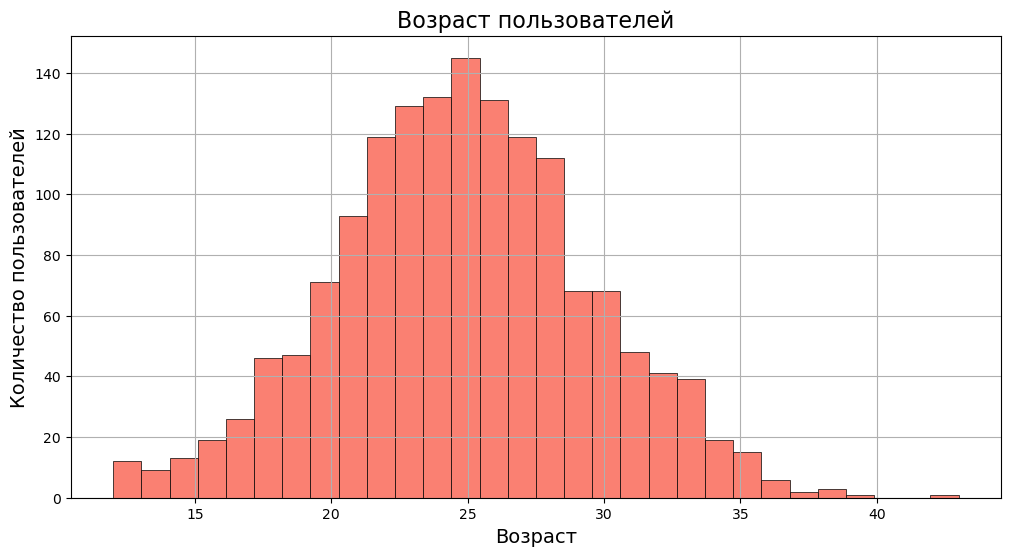

In [40]:
# построение гистограммы возраста пользователей
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(users['age'], bins=30, color='salmon', edgecolor='black', linewidth=0.5)

# добавляем сетку
ax.grid(True)

# устанавливаем заголовки и подписи осей
ax.set_title('Возраст пользователей', fontsize=16)
ax.set_xlabel('Возраст', fontsize=14)
ax.set_ylabel('Количество пользователей', fontsize=14)

# показываем график
plt.show()

In [41]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Средний возраст 25 лет.

### Расстояние, которое пользователь преодолел за одну поездку

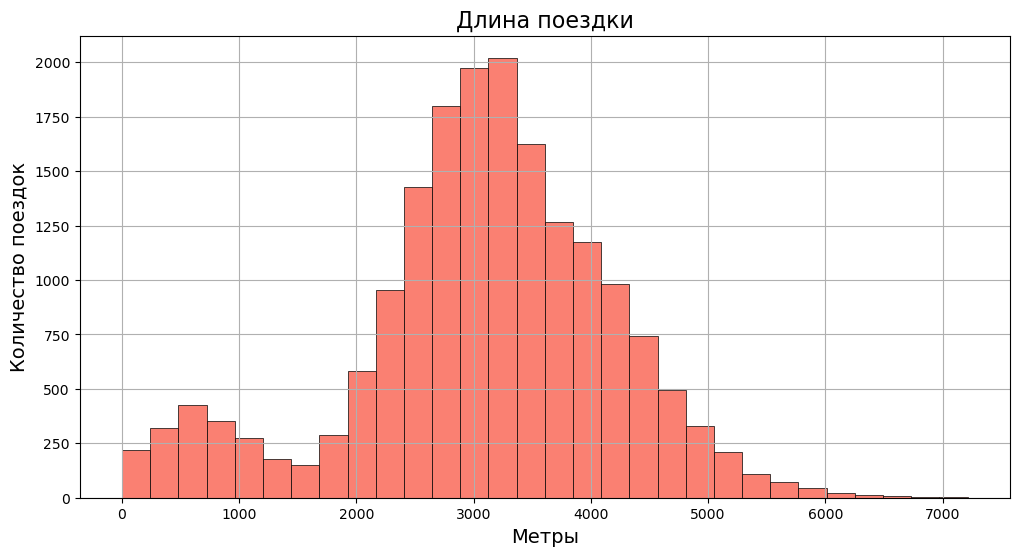

In [44]:
# Построение гистограммы длины поездок
fig, ax = plt.subplots(figsize=(12, 6))
rides['distance'].hist(bins=30, color='salmon', edgecolor='black', linewidth=0.5, ax=ax)

# Добавляем сетку
ax.grid(True)

# Устанавливаем заголовки и подписи осей
ax.set_title('Длина поездки', fontsize=16)
ax.set_xlabel('Метры', fontsize=14)
ax.set_ylabel('Количество поездок', fontsize=14)

# Показываем график
plt.show()

In [45]:
rides['distance'].describe()

count    18068.000000
mean      3071.159841
std       1116.831548
min          1.000000
25%       2543.750000
50%       3134.000000
75%       3777.000000
max       7212.000000
Name: distance, dtype: float64

Длина средней поездки - 3км. Также есть всплеск в районе 600 метров.

###  Продолжительность поездок

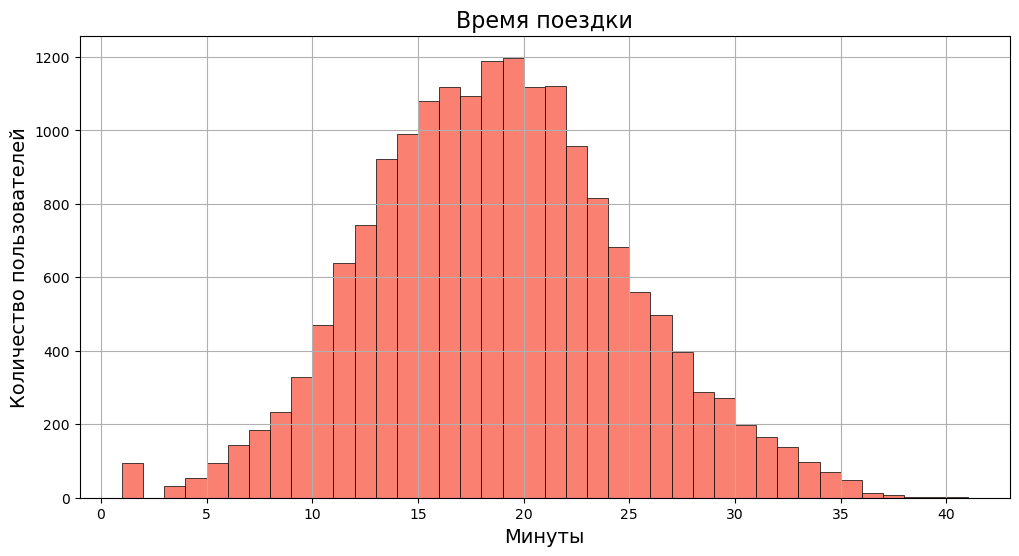

In [48]:
# Построение гистограммы времени поездок
fig, ax = plt.subplots(figsize=(12, 6))
rides['duration'].hist(bins=40, color='salmon', edgecolor='black', linewidth=0.5, ax=ax)

# Добавляем сетку
ax.grid(True)

# Устанавливаем заголовки и подписи осей
ax.set_title('Время поездки', fontsize=16)
ax.set_xlabel('Минуты', fontsize=14)
ax.set_ylabel('Количество пользователей', fontsize=14)

# Показываем график
plt.show()

In [49]:
rides['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

Среднее время поездки - 18 минут. Есть аномально короткие поездки в одну минуту. Возможно это связано с тем что люди передумали арендовать самокат.

Проведен исследовательский анализ данных, в ходе которого мы выяснили следующее:
   - Распределение пользователей по городам. Всего 8 городов представлено в исследовании. Больше всего пользователей в Пятигорске. Москва на последнем месте. Возможно компания начала свой бизнес с городов с низкой конкуренцией. В Москве обычно сложнее конкурировать, так как в любом сигменте бизнеса всегда есть как минимум 2-3 игрока. 
   - Соотношение пользователей с подпиской и без. Пользователей без подписки - 54%. С подпиской - 46%.
   - Возраст пользователей. Средний возраст 25 лет. Максимальный 43 года. Есть аномально низкие значения (12 лет). Здесь нужно провести работу по выяснению причин, по которым дети смогли незаконно воспользоваться сервисом чтобы избежать таких проблем в будущем.
   - Длина одной поездки. В среднем длина одной поездки - 3км. Также есть всплеск в районе 600 метров. Возможно это связано с тем что люди используют сервис для того чтобы добраться до метро(в Москве), либо до остановки(в других городах).
   - Продолжительность одной поездки. Среднее время поездки - 18 минут. Есть аномально короткие поездки в одну минуту. Возможно это связано с тем что люди передумали арендовать самокат. Либо какая-то техническая неисправность. Либо баг в проложении сервиса.

## 4 Объединение данных

### Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

In [54]:
df = users.merge(rides)

In [55]:
df = df.merge(sub_type)

In [56]:
df.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2618,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,755,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2695,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4029,27,2021-08-28,8,6,0,199


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  int64         
 6   duration           18068 non-null  int64         
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(7), object(3)
memory usage: 1.6+ MB


### Создайте ещё два датафрейма из датафрейма, созданного на предыдущем этапе

In [59]:
no_sub = df.query("`subscription_type` == 'free'")

In [60]:
no_sub.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2516,15,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,847,17,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4005,21,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1206,10,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3048,18,2021-02-14,2,8,50,0


In [61]:
with_sub = df.query("`subscription_type` == 'ultra'")

In [62]:
with_sub.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2618,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,755,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2695,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4029,27,2021-08-28,8,6,0,199


### Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

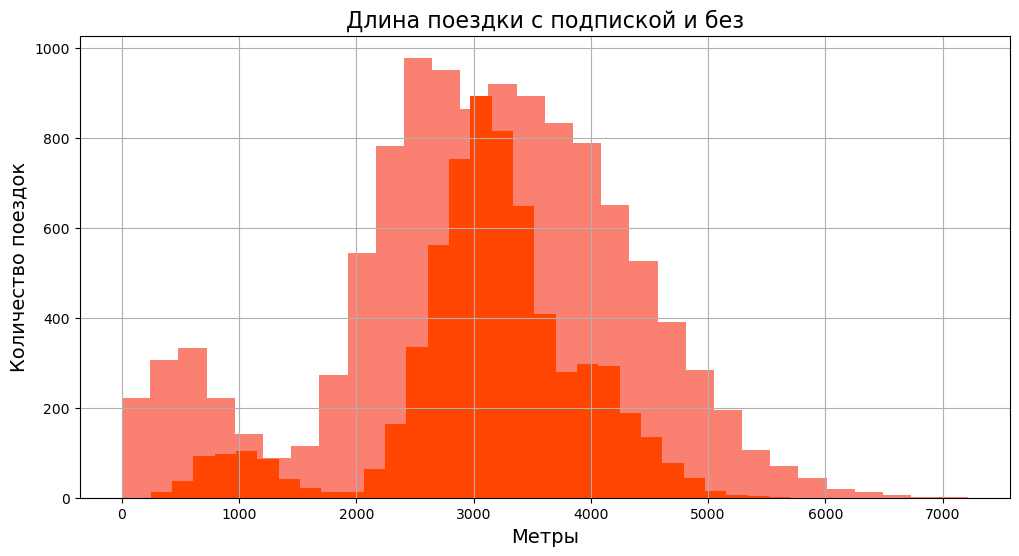

In [64]:
# Построение гистограммы длины поездок пользователей без подписки
ax = no_sub['distance'].plot(kind = 'hist', grid=True, figsize = (12,6), bins = 30, color='salmon', label='без подписки')
ax = with_sub['distance'].plot(kind = 'hist', grid=True, figsize = (12,6), bins = 30, color='orangered', label='с подпиской')

# Добавляем сетку
ax.grid(True)

# Устанавливаем заголовки и подписи осей
ax.set_title('Длина поездки с подпиской и без', fontsize=16)
ax.set_xlabel('Метры', fontsize=14)
ax.set_ylabel('Количество поездок', fontsize=14)

# Показываем график
plt.show()

In [65]:
no_sub['distance'].describe()

count    11568.000000
mean      3045.992911
std       1246.174341
min          1.000000
25%       2367.000000
50%       3115.000000
75%       3906.000000
max       7212.000000
Name: distance, dtype: float64

In [66]:
with_sub['distance'].describe()

count    6500.000000
mean     3115.949231
std       836.894838
min       245.000000
25%      2786.000000
50%      3149.000000
75%      3561.000000
max      5700.000000
Name: distance, dtype: float64

Первый пик у пользователей с подпиской находится на 1км. У пользователей без подписки - на 600 метрах. Средняя длина поездки практически совпадает и ровняется 3км.

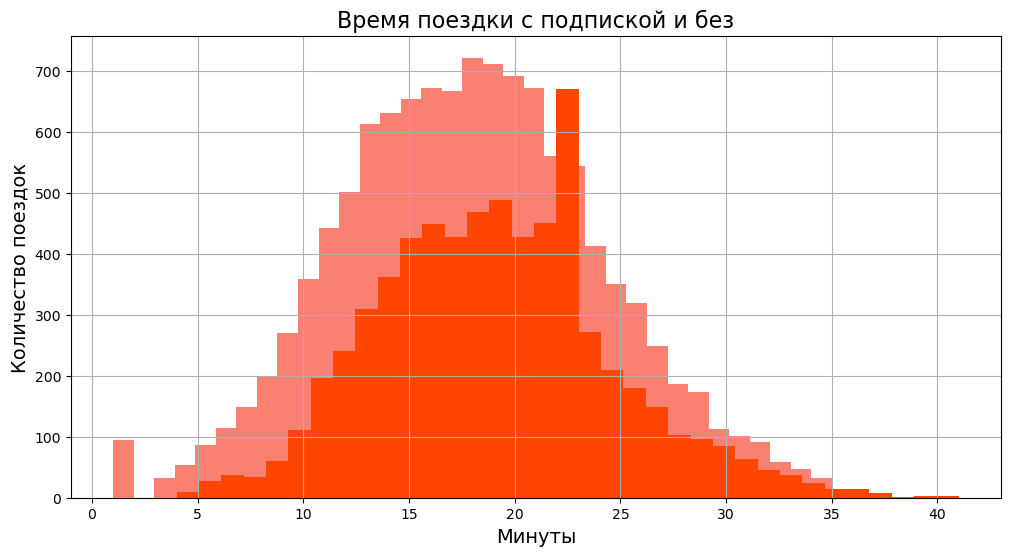

In [68]:
# Построение гистограммы длины поездок пользователей без подписки
ax = no_sub['duration'].plot(kind = 'hist', grid=True, figsize = (12,6), bins = 35, color='salmon', label='без подписки')
ax = with_sub['duration'].plot(kind = 'hist', grid=True, figsize = (12,6), bins = 35, color='orangered', label='с подпиской')

# Добавляем сетку
ax.grid(True)

# Устанавливаем заголовки и подписи осей
ax.set_title('Время поездки с подпиской и без', fontsize=16)
ax.set_xlabel('Минуты', fontsize=14)
ax.set_ylabel('Количество поездок', fontsize=14)

# Показываем график
plt.show()

In [69]:
no_sub['duration'].describe()

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

У пользователей без подписки имеются совсем короткие поездки(около 100 штук). У пользователей с подпиской есть всплеск на 22 минуте.

- Были объединены данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().
- Были созданы два датафрейма: пользователи с подпиской; пользователи без подписки
- Были визуализированны и проанализированны следующие данные:
 - Длина одной поездки с подпиской и без. Первый всплеск активности у пользователей с подпиской находится на 1км. У пользователей без подписки - на 600 метрах. Средняя длина поездки практически совпадает в обоих категориях и ровняется 3км.
 - Продолжительность одной поездки с подпиской и без. У пользователей без подписки имеются совсем короткие поездки(около 100 штук). У пользователей с подпиской есть всплеск на 22 минуте.   

## 5 Подсчёт выручки

### Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [74]:
# группируем данные по user_id и month
aggregated_df = df.groupby(['user_id', 'month']).agg({
    'distance': 'sum',
    'duration': 'sum',
    'user_id': 'count',
    'subscription_type': 'first',
    'subscription_fee': 'first'
    
    #'minute_price' : min,
    #'start_ride_price' : max
}).rename(columns={'user_id': 'num_of_trips'})

In [75]:
aggregated_df.head(10)

distance  duration  num_of_trips subscription_type  \
user_id month                                                       
1       1          7028        42             2             ultra   
        4           755         7             1             ultra   
        8          6724        46             2             ultra   
        10         5811        32             2             ultra   
        11         7005        56             3             ultra   
        12         6753        28             2             ultra   
2       3         10190        63             3             ultra   
        4          6165        40             2             ultra   
        6          3256        14             1             ultra   
        7          6781        48             2             ultra   

               subscription_fee  
user_id month                    
1       1                   199  
        4                   199  
        8                   199  
        10                  199  
        11                  199  
        12                  199  
2       3                   199  
        4                   199  
        6                   199  
        7                   199

In [76]:
aggregated_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1) to (1534, 12)
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   distance           11331 non-null  int64 
 1   duration           11331 non-null  int64 
 2   num_of_trips       11331 non-null  int64 
 3   subscription_type  11331 non-null  object
 4   subscription_fee   11331 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 487.9+ KB


### В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например,  значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.

In [78]:
# добавляем переменные
start_fee = 50
fee_per_min_no_sub = 8
fee_per_min_with_sub = 6

def calculate_revenue(row):
    if row['subscription_type'] == 'ultra':
        return fee_per_min_with_sub  * row['duration'] + row['subscription_fee']
    elif row['subscription_type'] == 'free':
        return fee_per_min_no_sub * row['duration'] + start_fee * row['num_of_trips']

In [79]:
aggregated_df['monthly_sales'] = aggregated_df.apply(calculate_revenue, axis=1)

In [80]:
aggregated_df.head(10)

distance  duration  num_of_trips subscription_type  \
user_id month                                                       
1       1          7028        42             2             ultra   
        4           755         7             1             ultra   
        8          6724        46             2             ultra   
        10         5811        32             2             ultra   
        11         7005        56             3             ultra   
        12         6753        28             2             ultra   
2       3         10190        63             3             ultra   
        4          6165        40             2             ultra   
        6          3256        14             1             ultra   
        7          6781        48             2             ultra   

               subscription_fee  monthly_sales  
user_id month                                   
1       1                   199            451  
        4                   199            241  
        8                   199            475  
        10                  199            391  
        11                  199            535  
        12                  199            367  
2       3                   199            577  
        4                   199            439  
        6                   199            283  
        7                   199            487

In [81]:
# Комментарий ревьюера
# Контроль суммы выручки
tmp, col_rev = aggregated_df.copy(), 'monthly_sales'
print("Правильное значение суммы выручки 3878641, сумма выручки расчитанная в таблице:", tmp[col_rev].sum())

Правильное значение суммы выручки 3878641, сумма выручки расчитанная в таблице: 3878641


## 6 Проверка гипотез

### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

- Нулевая гипотеза: пользователи с подпиской тратят столько же времени на поездку сколько пользователи без подписки
- Альтернативня гипотеза: пользователи с подпиской трятят больше времени на поездки

In [85]:
# добавим необходимые библиотеки
from scipy import stats as st

In [86]:
# задаем параметр альфа
alpha = 0.05

# правостороняя альтернативная гипотеза
results = st.ttest_ind(with_sub['duration'], no_sub['duration'], equal_var=False, alternative='greater')

print('P-value:',results.pvalue)

if results.pvalue < alpha:
    print('Вывод: отвергаем нулевую гипотезу. Пользователи с подпиской тратят больше времени на поездки.')
else:
    print('Вывод: не получилось отвергнуть нулевую гипотезу')

P-value: 1.1814679253701353e-36
Вывод: отвергаем нулевую гипотезу. Пользователи с подпиской тратят больше времени на поездки.


### Расстояние одной поездки в 3,130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

- Нулевая гипотеза: средняя длина одной поездки пользователей с подпиской не превышает 3,130 метров
- Альтернативная гипотеза: средняя длина одной поездки пользователей с подпиской больше 3,130 метров    

In [89]:
wanted_value = 3130

results2 = st.ttest_1samp(with_sub['distance'], wanted_value, alternative='greater')

print('P-value:',results2.pvalue.round(2))

if results2.pvalue < alpha:
    print('Вывод: отвергаем нулевую гипотезу')
else:
    print('Вывод: не получилось отвергнуть нулевую гипотезу. Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, меньше 3,130 метров.')

P-value: 0.91
Вывод: не получилось отвергнуть нулевую гипотезу. Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, меньше 3,130 метров.


### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

- Нулевая гипотеза: месячная выручка от пользователей с подпиской равна месячной выручки от пользователей без подписки
- Альтернатиная гипотеза: месячная выручки от пользователей с подпиской выше, чем месячная выручка от пользователей без подписки

In [92]:
#создаем два массива данных
aggregated_df_with_sub = aggregated_df[aggregated_df['subscription_type'] == 'ultra']
aggregated_df_no_sub = aggregated_df[aggregated_df['subscription_type'] == 'free']

results3 = st.ttest_ind(aggregated_df_with_sub['monthly_sales'], aggregated_df_no_sub['monthly_sales'], alternative='greater')

print('P-value:', results3.pvalue)

if results3.pvalue < alpha:
    print('Вывод: отвергаем нулевую гипотезу. Месячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.')
else:
    print('Вывод: не получилось отвергнуть нулевую гипотезу')

P-value: 1.8850394384715216e-31
Вывод: отвергаем нулевую гипотезу. Месячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.


### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для проверки гипотезы о том, что обновление серверов привело к значимому снижению количества обращений в техподдержку, нам нужно провести статистический анализ данных до и после обновления. Один из подходящих тестов в этом случае – парный t-тест (paired t-test).

Это односторонняя гипотеза. В данном случае нас интересует, произошло ли снижение количества обращений в техподдержку после обновления серверов. То есть наша альтернатива направлена в одну сторону: уменьшение количества обращений.

Если бы мы хотели проверить просто наличие любого изменения (то есть увеличение или уменьшение количества обращений), тогда это была бы двусторонняя гипотеза. Однако в нашем случае интерес представляет именно снижение, поэтому гипотеза односторонняя.

## 7 Выводы

1. Были получены три фаила с данными о пользователях, поездках и типах подписок:
    - После загрузки данных, была изучена общая информация в каждом датафрейме
    - Пропуски в данных остуствуют
    - Названия столбцов редактировать не нужно
    - У некоторых столбцов необходимо пометь тип данных
2. Была проведена предобработка данных:
    - Был изменён формат столбца date с object на дату в датафрейме rides(поездки)
    - Мы проверили что все данные относятся к одному периоду(2021 год)
    - Был добавлен столбец с указанием месяца когда пользователь пользовался сервисом в датафрейме rides
    - Были удалены явные дубликаты(31 шт.) в датафрейме users(пользователи)
    - Были округлены данные в столбцах distance и duration в датафрейме rides
    - Мы проверили длительность поездок на аномальные значения. Мы выявили около 75 довольно длительных поездки. Люди иногда арендуют самокаты продолжительное время(30-40 минут)
    - Также мы выявили 183 коротких поездки(меньше 5 минут). Возможно люди передумали арендовать самокат
    
    
3. Был проведен исследовательский анализ данных, в ходе которого было выявлено:
    - Частота встречаемости городов. Всего 8 городов представлено в исследовании. Больше всего пользователей из Пятигорска
    - Пользователей без подписки - 835 человек; с подпиской - 699
    - Средний возраст пользователей - 25 лет
    - Большинство поездок составляют 3000 метров. Также есть всплеск на 600 метрах. Возможно это связано с тем что люди используют сервис для того чтобы добраться до метро(в Москве), либо до остановки(в других городах).
    - Среднее время одной поездки - 18 минут. Есть аномально короткие поездки в одну минуту. Возможно это связано с тем что люди передумали арендовать самокат. Либо какая-то техническая неисправность. Либо баг в проложении сервиса.
    
4. Объединение данных:
   - Были объединены данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().
   - Были созданы два датафрейма: пользователи с подпиской; пользователи без подписки
   - Были визуализированны и проанализированны следующие данные:
   - Длина одной поездки с подпиской и без. Первый всплеск активности у пользователей с подпиской находится на 1км. У пользователей без подписки - на 600 метрах. Средняя длина поездки практически совпадает в обоих категориях и ровняется 3км.
   - Продолжительность одной поездки с подпиской и без. У пользователей без подписки имеются совсем короткие поездки(около 100 штук). У пользователей с подпиской есть всплеск на 22 минуте.
    
5. Подсчет выручки:
     - Был создан датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц
     - В этот датафрейм был добавлен столбец с помесячной выручкой, которую принёс каждый пользователь. 
    
5. Были проверены следующие гипотезы:
     - Пользователи с подпиской тратят столько же времени на поездку сколько пользователи без подписки. Мы отвергли эту гипотезу. Пользователи с подпиской тратят больше времени на поездки.
     - Средняя длина одной поездки пользователей с подпиской не превышает 3,130 метров. Не получилось отвергнуть эту гипотезу. Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, меньши либо равно 3,130 метров.
     - Месячная выручка от пользователей с подпиской равна месячной выручки от пользователей без подписки. Мы отвергли эту гипотезу. Месячная выручка от пользователей с подпиской по месяцам выше.
    
     - Для проверки гипотезы о том, что обновление серверов привело к значимому снижению количества обращений в техподдержку, нам нужно провести статистический анализ данных до и после обновления. Один из подходящих тестов в этом случае – парный t-тест (paired t-test). Это односторонняя гипотеза. В данном случае нас интересует, произошло ли снижение количества обращений в техподдержку после обновления серверов. То есть наша альтернатива направлена в одну сторону: уменьшение количества обращений. Если бы мы хотели проверить просто наличие любого изменения (то есть увеличение или уменьшение количества обращений), тогда это была бы двусторонняя гипотеза. Однако в нашем случае интерес представляет именно снижение, поэтому гипотеза односторонняя.
